In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy

import pmana.utils

#### Parse Padova test-stand data

In [2]:
InputPath = pathlib.Path('/Users/triozzi/Analysis/PurityMonitors/Test_20250721_20250724_Ch4')
TargetPath = pathlib.Path('../data/DataPadova_20250721_20250724')

pmana.utils.io.FormatPadovaData(
    InputPath,  ###< raw Padova test-stand campaign
    TargetPath  ###< target path for the restructured data
)

#### Look at one single measurement

There were 2 used channels in this campaign.


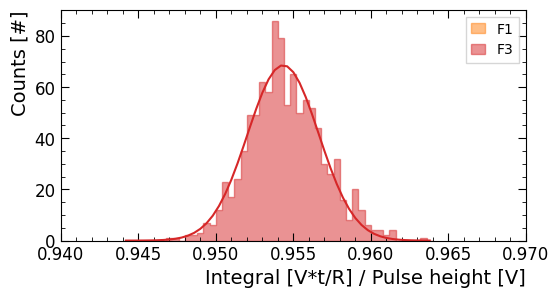

In [3]:
fig, ax = plt.subplots(figsize=(6,3))

# extract a measurement 
Data = pmana.utils.io.ExtractSingleMeasurement(
    "../data/DataPadova_20250721_20250724/00002/"
)
print(f"There were {len(Data)} used channels in this campaign.")

CHs = [1, 3]
for i, chname in enumerate(CHs):
    # plot channel data
    pmana.utils.plotting.PlotSingleChannel(
        Data[i],
        ax,
        channel = chname,
        rebin = True
    )

ax = pmana.utils.plotting.UpdateMatplotlibStyle(
    ax,
    "Integral [V*t/R] / Pulse height [V]",
    "Counts [#]"
)

ax.set_xlim(0.94, 0.97) # ax.set_xlim(0.7e-5, 0.78e-5)
plt.show()

#### Analyze a campaign

In [2]:
# get temperature mapping
Temperatures = pmana.utils.io.ExtractTemperatureMonitoring(
    "../data/PM_Temperature_20250721_20250724.txt"
)

# get time mapping
TimeMapping = pmana.utils.io.ExtractFileTimes(
    "../data/PadovaData_20250721_20250724_TimeMapping.txt"
)

In [4]:
# analyze campaign
Output = pmana.utils.anatestdata.Iterate(
    pathlib.Path('../data/DataPadova_20250721_20250724'),
    pmana.utils.anatestdata.AnalyzeMeasurement,
    TimeMapping
)

# re-format the dataframe
Output.columns = ["Peak_CH1", "Err_Peak_CH1", "Width_CH1", "Err_Width_CH1",
                  "Peak_CH2", "Err_Peak_CH2", "Width_CH2", "Err_Width_CH2", 
                  "Date", "Number"]

# sort by date
Output.sort_values(
    by = 'Date', 
    inplace = True,
    ignore_index = True
)

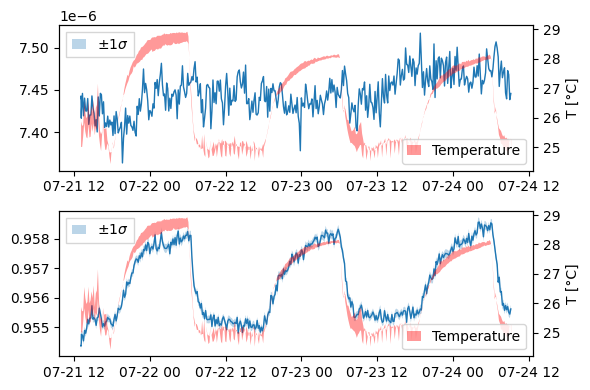

In [24]:
fig, ax = plt.subplots(figsize=(6, 2*2), nrows=2, layout='tight')

# CH1
ax[0].plot(Output.Date, Output.Peak_CH1, lw=1)
ax[0].fill_between(Output.Date, Output.Peak_CH1-Output.Err_Peak_CH1,  Output.Peak_CH1+Output.Err_Peak_CH1, alpha=0.3, label='$\pm1\sigma$')

# CH3
ax[1].plot(Output.Date, Output.Peak_CH2, lw=1)
ax[1].fill_between(Output.Date, Output.Peak_CH2-Output.Err_Peak_CH2,  Output.Peak_CH2+Output.Err_Peak_CH2, alpha=0.3, label='$\pm1\sigma$')

for a in ax:
    # legend
    a.legend(frameon=True, fancybox=False, handlelength=1)

    # plot temperatures
    a2 = a.twinx()
    a2.fill_between(Temperatures.Date, y1=Temperatures.T1, y2=Temperatures.T2, fc='red', alpha=0.4, label='Temperature', zorder=-3)

    a2.set(
        ylabel = 'T [°C]',
        #ylim = (0, 1e6)
    )
    a2.legend(handlelength=1, loc='lower right')

plt.show()